# BDS HW 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# PREPROCESSING

In [115]:
# CONVERT CSV FILE DATA INTO PANDAS DATAFRAME
df = pd.read_csv("Breast_Cancer_dataset.csv", header = 0)
print(df.shape)
df.head()

(4024, 16)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [116]:
# DATA CLEANING - NO MISSING VALUES

# ACCOUNTING FOR STRING IN GRADES COLUMN
df['Grade'] = df['Grade'].replace({' anaplastic; Grade IV': '4'})

# MANUAL ENCODING FOR DIFFERENTIATE
df['differentiate'] = df['differentiate'].replace({'Poorly differentiated': '3',
                                                   'Moderately differentiated': '2',
                                                   'Well differentiated': '1',
                                                   'Undifferentiated': '4'})
# LABEL ENCODING CATEGORICAL FEATURES
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,2,2,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,1,1,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,1,1,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,2,2,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,2,2,1,41,1,1,3,1,50,0


In [117]:
# NORMALIZATION
categorical = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
numerical = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# SEPARATING INTO CATEGORICAL AND NUMERICAL FEATURES
df_cat = df.drop(columns = numerical)
df_num = df.drop(columns = categorical)

# NORMALIZING NUMERICAL FEATURES
df_normal = StandardScaler().fit_transform(df_num)
df_normal = pd.DataFrame(df_normal, columns = numerical)
df_normal.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,1.565253,-1.253661,1.190676,-0.618172,-0.492961
1,-0.443222,0.214345,-0.044095,0.164807,-0.405695
2,0.449434,1.540287,-0.044095,0.556296,0.161530
3,0.449434,-0.590691,-1.525820,-0.618172,0.554224
4,-0.777968,0.498475,-1.402343,-0.618172,-0.929288


# FEATURE RANKING/SELECTION

In [118]:
# FEATURE RANKING BY VARIANCE OF EACH COLUMN'S DATA
print('VARIANCE FROM LOWEST TO HIGHEST')
print(df.var().sort_values())

VARIANCE FROM LOWEST TO HIGHEST
A Stage                     0.022346
Estrogen Status             0.062396
Status                      0.129680
Progesterone Status         0.143407
Race                        0.318621
differentiate               0.407342
Grade                       0.407342
N Stage                     0.480914
T Stage                     0.586038
Marital Status              1.131325
6th Stage                   1.604336
Reginol Node Positive      26.105265
Regional Node Examined     65.604732
Age                        80.337778
Tumor Size                446.041563
Survival Months           525.391932
dtype: float64


In [119]:
# CHI-SQUARED TESTING
from sklearn.feature_selection import chi2

# CHECK INDEPENDENCE OF ALL FEATURES
chi_scores, p_values = chi2(df.drop(columns = 'Status'), df['Status'])
chi_results = pd.DataFrame({'Feature': df.columns[:-1], 'Chi2': chi_scores, 'P-value': p_values})
print("CHI-SQUARED VALUES LOWEST TO HIGHEST")
print(chi_results.sort_values('Chi2'))

CHI-SQUARED VALUES LOWEST TO HIGHEST
                   Feature         Chi2        P-value
8                  A Stage     0.858223   3.542364e-01
1                     Race     1.807399   1.788206e-01
2           Marital Status     3.678110   5.513131e-02
10         Estrogen Status     9.171758   2.457783e-03
0                      Age    18.726416   1.508778e-05
11     Progesterone Status    21.887241   2.891501e-06
12  Regional Node Examined    22.226834   2.422641e-06
6            differentiate    37.100699   1.121835e-09
7                    Grade    37.100699   1.121835e-09
3                  T Stage    71.895064   2.269509e-17
4                  N Stage   288.723650   9.433298e-65
5                6th Stage   324.105261   1.848009e-72
9               Tumor Size  1060.568970  1.227825e-232
13   Reginol Node Positive  1663.529375   0.000000e+00
14         Survival Months  6731.442099   0.000000e+00


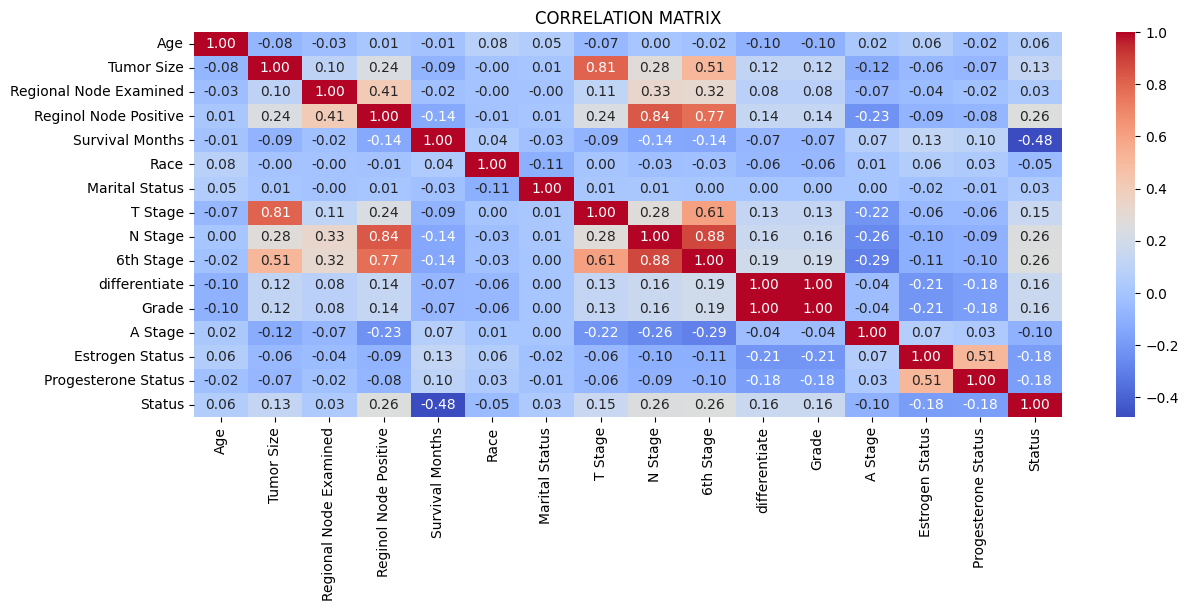

In [120]:
# CORRELATION MATRIX FOR BOTH CATEGORICAL AND NUMERICAL FEATURES
df_all = pd.concat([df_normal, df_cat], axis = 1)
correlation_matrix = df_all.corr()

# VISUAL WITH SEABORN
plt.figure(figsize=(14, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('CORRELATION MATRIX')
plt.show()

In [121]:
# REMOVING FEATURES
remove = ['differentiate', 'A Stage', 'Race', 'Estrogen Status', '6th Stage', 'T Stage', 'Reginol Node Positive']
df_reduced = df_all.drop(columns = remove)
df_reduced.head()

,Age,Tumor Size,Regional Node Examined,Survival Months,Marital Status,N Stage,Grade,Progesterone Status,Status
0,1.565253,-1.253661,1.190676,-0.492961,1,0,2,1,0
1,-0.443222,0.214345,-0.044095,-0.405695,1,1,1,1,0
2,0.449434,1.540287,-0.044095,0.161530,0,2,1,1,0
3,0.449434,-0.590691,-1.525820,0.554224,1,0,2,1,0
4,-0.777968,0.498475,-1.402343,-0.929288,1,0,2,1,0


# CLASSIFICATION ALGORITHMS

In [122]:
# SPLITTING INTO TRAINING AND VALIDATION SET
y = df_reduced['Status'].to_numpy()
X = df_reduced.drop(columns = ['Status']).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MAXIMUM TEST ACCURACY AT K = 14: 0.9043478260869565



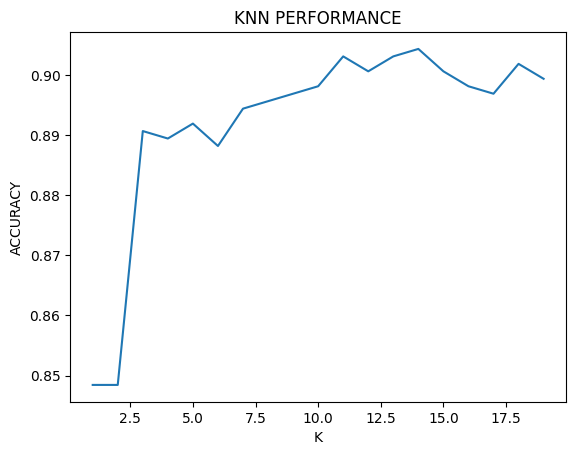

In [123]:
from collections import Counter

# K-NEAREST NEIGHBORS CLASSIFIER
class KNN:
    def __init__(self, k=8):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.sqrt(np.sum((x-self.X_train)**2, axis=1))      # EUCLIDEAN DISTANCE
            k_indices = np.argsort(distances)[:self.k]                    # INDICES OF K SMALLEST DISTANCES
            k_nearest_labels = [self.y_train[i] for i in k_indices]       # COLLECT LABELS OF K-NEAREST INDICES
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]  # CHECK MOST COMMON & ADD TO PREDICTIONS
            predictions.append(most_common)
        return predictions

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

# RUN FOR SEVERAL K-VALUES TO CHECK FOR HIGHEST TEST ACCURACY
accuracies = []
ks = range(1,20)
for k in ks:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

# FIND K WHICH GIVES MAXIMUM ACCURACY
max_accuracy = max(accuracies)
k_max = ks[accuracies.index(max_accuracy)]
print(f"MAXIMUM TEST ACCURACY AT K = {k_max}: {max_accuracy}\n")

# PLOTTING PERFORMANCE FOR EACH K-VALUE
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="K", ylabel="ACCURACY", title="KNN PERFORMANCE")
plt.show()

In [125]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# TRAIN NAIVE BAYES MODEL WITH SKLEARN
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# PREDICT AND EVALUATE
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"TEST ACCURACY: {accuracy}\n")
print(f"CLASSIFICATION REPORT:\n {report}")

TEST ACCURACY: 0.8881987577639752

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       685
           1       0.64      0.56      0.60       120

    accuracy                           0.89       805
   macro avg       0.78      0.75      0.77       805
weighted avg       0.88      0.89      0.88       805



In [132]:
# C4.5 DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# TRAIN DECISION TREE WITH SKLEARN
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# PREDICT AND EVALUATE
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"TEST ACCURACY: {accuracy}\n")
print(f"CLASSIFICATION REPORT:\n {report}\n")

# RANKING FEATURES BY IMPORTANCE
feature_importances = clf.feature_importances_
features_sorted = sorted(zip(df_reduced.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("FEATURE IMPORTANCES:")
for name, importance in features_sorted:
    print(f"{name}: {importance}")

TEST ACCURACY: 0.8633540372670807

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       685
           1       0.54      0.61      0.57       120

    accuracy                           0.86       805
   macro avg       0.73      0.76      0.74       805
weighted avg       0.87      0.86      0.87       805


FEATURE IMPORTANCES:
Survival Months: 0.44658734041167547
Tumor Size: 0.14322599672679331
Age: 0.12863723885396133
Regional Node Examined: 0.11572241361402878
Marital Status: 0.058028827064930316
N Stage: 0.03791026473837777
Grade: 0.036775388828133665
Progesterone Status: 0.033112529762099406


In [133]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# TRAIN RANDOM FOREST WITH SKLEARN
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# PREDICT AND EVALUATE
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"TEST ACCURACY: {accuracy}\n")
print(f"CLASSIFICATION REPORT:\n {report}\n")

# RANKING FEATURES BY IMPORTANCE
feature_importances = rf.feature_importances_
features_sorted = sorted(zip(df_reduced.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("FEATURE IMPORTANCES:")
for name, importance in features_sorted:
    print(f"{name}: {importance}")

TEST ACCURACY: 0.9180124223602485

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       685
           1       0.86      0.53      0.66       120

    accuracy                           0.92       805
   macro avg       0.89      0.76      0.81       805
weighted avg       0.91      0.92      0.91       805


FEATURE IMPORTANCES:
Survival Months: 0.424057038085758
Age: 0.1459897221593003
Tumor Size: 0.14039261378627935
Regional Node Examined: 0.12682187302548906
N Stage: 0.05233283343798137
Marital Status: 0.04803267700768891
Grade: 0.035508696582047056
Progesterone Status: 0.026864545915456017


In [134]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier

# TRAIN GRADIETN BOOSTING MODEL WITH SKLEARN
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# PREDICT AND EVALUATE
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"TEST ACCURACY: {accuracy}\n")
print(f"CLASSIFICATION REPORT:\n {report}\n")

# RANKING FEATURES BY IMPORTANCE
feature_importances = gb.feature_importances_
features_sorted = sorted(zip(df_reduced.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("FEATURE IMPORTANCES:")
for name, importance in features_sorted:
    print(f"{name}: {importance}")

TEST ACCURACY: 0.9093167701863354

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.81      0.51      0.63       120

    accuracy                           0.91       805
   macro avg       0.87      0.74      0.79       805
weighted avg       0.90      0.91      0.90       805


FEATURE IMPORTANCES:
Survival Months: 0.7360022839126167
Age: 0.07994489255319147
N Stage: 0.05003073327241657
Tumor Size: 0.043226413450976116
Progesterone Status: 0.030191066823850404
Grade: 0.025845302419345288
Regional Node Examined: 0.0243974785786284
Marital Status: 0.010361828988974999


# HYPERPARAMETER TUNING

In [135]:
# GRADIENT BOOSTING HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

# RANGE OF PARAMETERS TO TUNE
params = {
    'n_estimators': np.arange(100, 300, 10),
    'learning_rate': np.arange(0.01, 0.05, 0.01),
    'max_depth': np.arange(3, 5, 1)
}

# SET UP AND FIT GRIDSEARCH FOR GRADIENT BOOSTING
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# BEST PARAMS AND SCORE
print("BEST PARAMS:", grid_search.best_params_)
print("BEST ACCURACY:", grid_search.best_score_)

# EVALUATING BEST RESULTS
y_pred = grid_search.best_estimator_.predict(X_test)
print("TEST ACCURACY:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

BEST PARAMS: {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 110}
BEST ACCURACY: 0.9027648337993166
TEST ACCURACY: 0.9105590062111801
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.82      0.51      0.63       120

    accuracy                           0.91       805
   macro avg       0.87      0.74      0.79       805
weighted avg       0.91      0.91      0.90       805



In [136]:
# RANDOM FOREST HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV

# RANGE OF PARAMETERS TO TUNE
params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# SET UP AND FIT GRIDSEARCH FOR RANDOM FOREST
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=100, cv=3, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

# BEST PARAMS AND SCORE
print("BEST PARAMS:", random_search.best_params_)
print("BEST ACCURACY:", random_search.best_score_)

# EVALUATING BEST RESULTS
y_pred_rf = random_search.best_estimator_.predict(X_test)
print("TEST ACCURACY:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

BEST PARAMS: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
BEST ACCURACY: 0.9049394221808015
TEST ACCURACY: 0.9118012422360249
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.85      0.50      0.63       120

    accuracy                           0.91       805
   macro avg       0.88      0.74      0.79       805
weighted avg       0.91      0.91      0.90       805

